In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# libraries
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading Cancer data and build model on premenopausal data

In [2]:
import pickle
file = open("data_premeno","rb")
X_train = pickle.load(file)
y_train = pickle.load(file)
X_test = pickle.load(file)
y_test = pickle.load(file)
file.close()

In [3]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score, classification_report

In [4]:
def model_stats(X, y, y_pred, model):

    cm = confusion_matrix(y, y_pred)
    print("Confusion Matrix ->")
    print(cm)

    TP = cm[1,1] # true positive 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatives
    
    print("Accuracy:",accuracy_score(y, y_pred))

    # Let's see the sensitivity of our model
    print("Sensitivity:",TP / float(TP+FN))

    # Let us calculate specificity
    print("Specificity:",TN / float(TN+FP))

    # Let us calculate precision
    print("Precision",TP / float(TP+FP))
    print("MCC ", metrics.matthews_corrcoef(y, y_pred))
    print("F1 ", metrics.fbeta_score(y, y_pred, beta = 1))
    print("F2 ", metrics.fbeta_score(y, y_pred, beta = 2))
    print("F3 ", metrics.fbeta_score(y, y_pred, beta = 3))
    
    print("Classification report")
    print(metrics.classification_report(y, y_pred))
    
    # Predicting probability for roc_auc
    pred_probs = model.predict_proba(X)[:,1]
    print("ROC-AUC : {:2.3}".format(roc_auc_score(y, pred_probs)))

    # Plotting ROC curve
    fpr, tpr, thresholds = roc_curve(y, pred_probs, drop_intermediate = False )
    auc_score = roc_auc_score(y, pred_probs)
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

## Model building on unsampled data with default parameters

In [5]:
### 2: Model Building

# Importing LogisticRegression and metrics from sklearn library
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [6]:
# Running Logistic Regression on default values
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

LogisticRegression()

Confusion Matrix ->
[[17009     7]
 [  697    10]]
Accuracy: 0.960277605371551
Sensitivity: 0.014144271570014143
Specificity: 0.9995886224729666
Precision 0.5882352941176471
MCC  0.0868192088491874
F1  0.02762430939226519
F2  0.01757469244288225
F3  0.01567398119122257
Classification report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17016
           1       0.59      0.01      0.03       707

    accuracy                           0.96     17723
   macro avg       0.77      0.51      0.50     17723
weighted avg       0.95      0.96      0.94     17723

ROC-AUC : 0.826


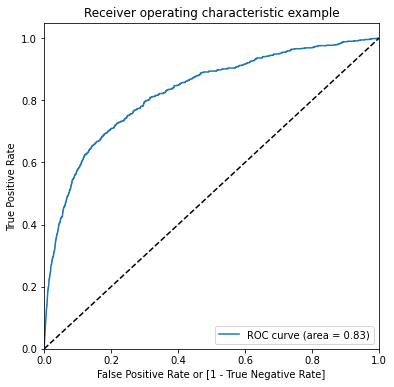

In [7]:
#predicting the train data
y_pred_train=logreg.predict(X_train)

model_stats(X_train, y_train, y_pred_train, logreg)

Confusion Matrix ->
[[9822    7]
 [ 260    8]]
Accuracy: 0.9735565019312667
Sensitivity: 0.029850746268656716
Specificity: 0.9992878217519585
Precision 0.5333333333333333
MCC  0.12161056145858021
F1  0.05653710247349823
F2  0.03679852805887764
F3  0.03296250515039143
Classification report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9829
           1       0.53      0.03      0.06       268

    accuracy                           0.97     10097
   macro avg       0.75      0.51      0.52     10097
weighted avg       0.96      0.97      0.96     10097

ROC-AUC : 0.781


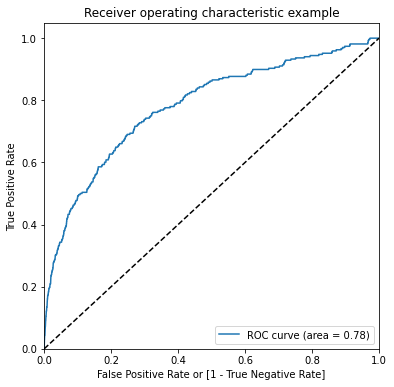

In [8]:
# predicting on the test data
y_pred_test=logreg.predict(X_test)

model_stats(X_test, y_test, y_pred_test, logreg)

In [9]:
import pickle
file = open("data_postmeno","rb")
X_train = pickle.load(file)
y_train = pickle.load(file)
X_test = pickle.load(file)
y_test = pickle.load(file)
file.close()

In [10]:
# Running Logistic Regression on default values
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

LogisticRegression()

Confusion Matrix ->
[[87280     0]
 [ 3433     0]]
Accuracy: 0.962155369131216
Sensitivity: 0.0
Specificity: 1.0
Precision nan
MCC  0.0
F1  0.0
F2  0.0
F3  0.0
Classification report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     87280
           1       0.00      0.00      0.00      3433

    accuracy                           0.96     90713
   macro avg       0.48      0.50      0.49     90713
weighted avg       0.93      0.96      0.94     90713

ROC-AUC : 0.751


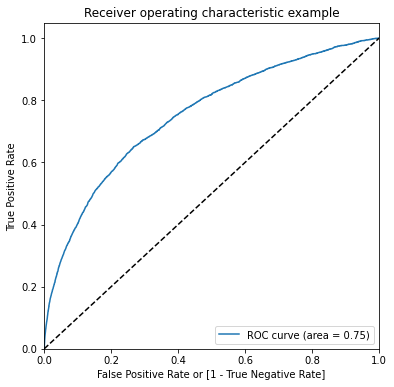

In [11]:
#predicting the train data
y_pred_train=logreg.predict(X_train)

model_stats(X_train, y_train, y_pred_train, logreg)

Confusion Matrix ->
[[45283     0]
 [ 1247     0]]
Accuracy: 0.9732000859660435
Sensitivity: 0.0
Specificity: 1.0
Precision nan
MCC  0.0
F1  0.0
F2  0.0
F3  0.0
Classification report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     45283
           1       0.00      0.00      0.00      1247

    accuracy                           0.97     46530
   macro avg       0.49      0.50      0.49     46530
weighted avg       0.95      0.97      0.96     46530

ROC-AUC : 0.722


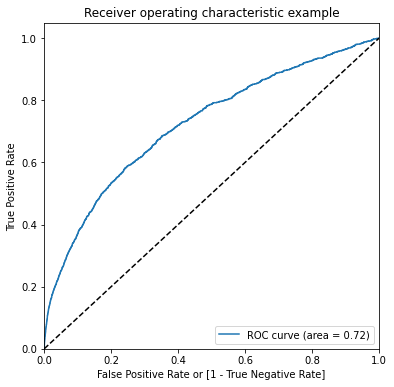

In [12]:
# predicting on the test data
y_pred_test=logreg.predict(X_test)

model_stats(X_test, y_test, y_pred_test, logreg)